# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Running in a jupyter notebook where the data folder is another folder in the root directory
training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# Create a set from the labels data because sets discard duplicate values
classes_set = set(y_train)
n_classes = len(classes_set)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation = ", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation =  4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

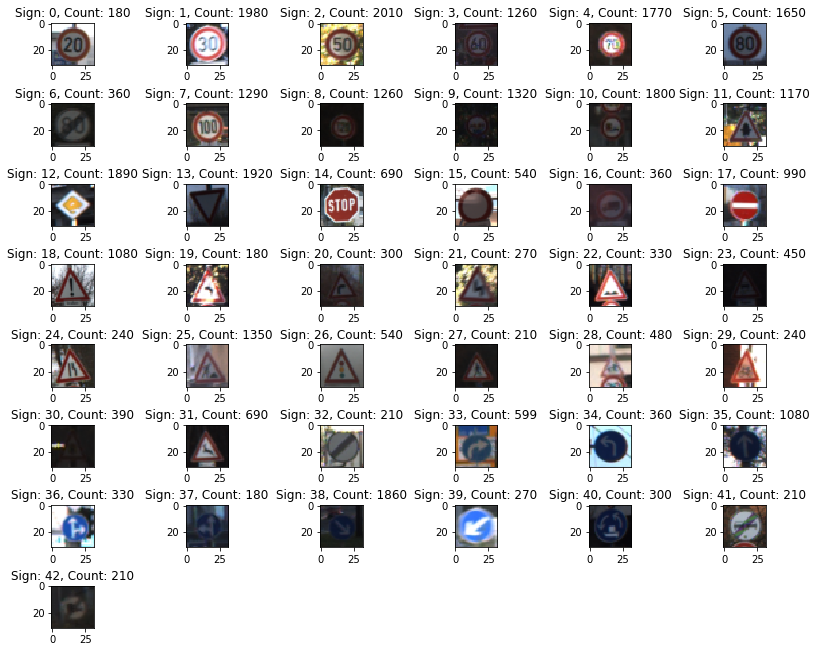

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

# Shuffle data
X_train, y_train = shuffle(X_train, y_train)
# Visualizations will be shown in the notebook.
%matplotlib inline

# Create a 8x6 figure that we will plot 43 samples onto
fig = plt.figure(figsize=(8,6))

# Used to hold the subplots so we can add titles to them after plotting them
ax = []

# Loop through the total number of classes and display one example from each
for i in range(n_classes):
    # Get the index of the first example of the ith class from the list of labels
    idx = y_train.tolist().index(i)
    # Get the number of that class in the training set
    class_reps = y_train.tolist().count(i)
    
    # Get the corresponding image
    img = X_train[idx]
    
    # create subplot and append to ax
    ax.append(fig.add_subplot(8, 6, i+1) )
    ax[-1].set_title("Sign: " + str(i) + ", Count: " + str(class_reps))  # set title
    
    # Plot the image on that subplot
    plt.imshow(img)
    
# Show final plot
plt.subplots_adjust(left=.1, bottom=.1, right=1.5, top=1.5, wspace=0, hspace=.9)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2


# Convert from RGB to Gray so we can equalize the images 
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train])
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test])
X_valid = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_valid])


# Equalize the histogram of the image to increase contrast
X_train = np.array([cv2.equalizeHist(np.uint8(img)) for img in X_train])
X_test = np.array([cv2.equalizeHist(np.uint8(img)) for img in X_test])
X_valid = np.array([cv2.equalizeHist(np.uint8(img)) for img in X_valid])

# convert back to RGB
# This seems to be unable to recover color values due to the histogram equalization but it makes the image 32x32x3 which lets
# Keep the original network shape
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train])
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test])
X_valid = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_valid])


# Convert to floats so the mean can be subtracted without data loss
X_train = np.float32(X_train)
X_test = np.float32(X_test)
X_valid = np.float32(X_valid)

# Standardize the dataset by setting a 0 mean and then dividing by the standard deviation
X_train -= np.mean(X_train, axis=0) # Set a 0 mean
X_train /= (np.std(X_train, axis=0) + np.finfo('float32').eps) # Divide by stddev. Add a small epsilon to the end to prevent divide by 0 errors

X_test -= np.mean(X_test, axis=0)
X_test /= (np.std(X_test, axis=0) + np.finfo('float32').eps)

X_valid -= np.mean(X_valid, axis=0)
X_valid /= (np.std(X_valid, axis=0) + np.finfo('float32').eps)



### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer 1: Input = 32x32x3
    # Weights
    conv1_w = tf.Variable(tf.truncated_normal(shape=(3,3,3,64), mean=mu, stddev=sigma))
    # Bias for each of the depth layers
    conv1_b = tf.Variable(tf.zeros(64))
    # The actual convolution layer
    # Stride of 1 in all dimenstions, with zero padding
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    
    # ReLU Activation.
    conv1 = tf.nn.relu(conv1)

    # Max Pooling.
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

    # Convolutional Layer 2
    conv2_w = tf.Variable(tf.truncated_normal(shape=(3,3,64,128), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(128))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='SAME') + conv2_b
    
    # ReLU Activation.
    conv2 = tf.nn.relu(conv2)

    # Max Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    

    # Flatten the output of the convolution layers and connect it to the first fully connected layer
    fc0 = flatten(conv2)
    
    # Fully Connected 1. 
    fc1_w = tf.Variable(tf.truncated_normal(shape=(fc0.shape[1].value, 128), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    # ReLU Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout layer
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # Fully Connected 2. 
    fc2_w = tf.Variable(tf.truncated_normal(shape=(128, 64), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(64))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b
    
    # ReLU Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Fully Connected 3
    fc3_w = tf.Variable(tf.truncated_normal(shape=(64, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Create the placeholders for the data and lables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

# Placeholder for keep probability so we can change it during training and evaluation
keep_prob = tf.placeholder(tf.float32)
# One hot encode the labels
one_hot_y = tf.one_hot(y, 43)

In [7]:
# Define hyperparameters for training the network
EPOCHS = 30
BATCH_SIZE = 128
rate = .001

# Get the output of the network
logits = LeNet(x)

# Get the loss of the network
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Run the optimizer on the network to update its weights and biases
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Function to evaluate accuracy of a batch prediction
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # Make sure to use 1.0 for keep probability during evaluation
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    accuracies = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
               
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        # Keep track of the validation accuracies
        accuracies.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        # Save a model every epoch so we can just grab the best one based on the results
        save_path = saver.save(sess, save_path='./checkpoints/sign_classifier.ckpt', global_step=i + 1)
        print("Model saved for epoch " + str(i + 1) + " in " + save_path)
        print()
        
    print("Epoch " + str(accuracies.index(max(accuracies)) + 1) + " had the highest validation accuracy")
        
    

Training...

EPOCH 1 ...
Training Accuracy = 0.590
Validation Accuracy = 0.536
Model saved for epoch 1 in ./checkpoints/sign_classifier.ckpt-1

EPOCH 2 ...
Training Accuracy = 0.766
Validation Accuracy = 0.702
Model saved for epoch 2 in ./checkpoints/sign_classifier.ckpt-2

EPOCH 3 ...
Training Accuracy = 0.862
Validation Accuracy = 0.808
Model saved for epoch 3 in ./checkpoints/sign_classifier.ckpt-3

EPOCH 4 ...
Training Accuracy = 0.917
Validation Accuracy = 0.866
Model saved for epoch 4 in ./checkpoints/sign_classifier.ckpt-4

EPOCH 5 ...
Training Accuracy = 0.947
Validation Accuracy = 0.900
Model saved for epoch 5 in ./checkpoints/sign_classifier.ckpt-5

EPOCH 6 ...
Training Accuracy = 0.952
Validation Accuracy = 0.904
Model saved for epoch 6 in ./checkpoints/sign_classifier.ckpt-6

EPOCH 7 ...
Training Accuracy = 0.966
Validation Accuracy = 0.912
Model saved for epoch 7 in ./checkpoints/sign_classifier.ckpt-7

EPOCH 8 ...
Training Accuracy = 0.982
Validation Accuracy = 0.932
Mode

In [10]:
# Run the network on the test set to get it's accuracy on unseen data
with tf.Session() as sess:
    # Load the best checkpoint from the training 
    saver.restore(sess, "./checkpoints/sign_classifier.ckpt-30")
    
    test_accuracy = evaluate(X_test, y_test)
    print('Performance on test set: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./checkpoints/sign_classifier.ckpt-30
Performance on test set: 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

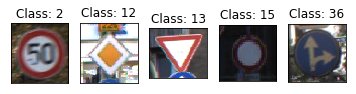

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

data_dir = 'new_test_images/'

images = []
labels = []

# Loop through the paths of all the new images and read them into a list
for path in os.listdir(data_dir):
    # Check if its a png file
    # This was only necessary because some ipynb_checkpoints file got randomly saved into that directory
    if path.endswith(".png"):
        images.append(cv2.cvtColor(cv2.imread(data_dir + path), cv2.COLOR_BGR2RGB))
        # Remove the file type
        root, _ = os.path.splitext(path)
        # Remove the leading chars to get just the number and add it to the labels
        labels.append(int(root[5:]))

# Display each of the images with their respective classes
# Create a 1x5 figure
fig, axis = plt.subplots(1, len(labels))

# Display each of the images
for i, img in enumerate(images):
    # Show image
    axis[i].imshow(img)
    
    # Display the class of the image
    axis[i].set_title("Class: {}".format(labels[i]))
    
    # Turn axis ticks off
    plt.setp(axis[i].get_xticklabels(), visible=False)
    plt.setp(axis[i].get_yticklabels(), visible=False)
    axis[i].set_xticks([]), axis[i].set_yticks([])


In [12]:
# Function to preprocess our new individual testing images
def preprocess_img(img):
    # Convert from RGB to Gray so we can equalize the images 
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Equalize the histogram of the image to increase contrast
    hist = cv2.equalizeHist(np.uint8(gray))
    
    # convert back to RGB
    # This seems to be unable to recover color values due to the histogram equalization but it makes the image 32x32x3 which lets
    # Keep the original network shape
    
    rgb_img = cv2.cvtColor(hist, cv2.COLOR_GRAY2RGB)

    # Convert to floats so the mean can be subtracted without data loss
    rgb_img = np.float32(rgb_img)

    # Standardize the dataset by setting a 0 mean and then dividing by the standard deviation
    rgb_img -= np.mean(rgb_img, axis=0) # Set a 0 mean
    rgb_img /= (np.std(rgb_img, axis=0) + np.finfo('float32').eps)
    
    # Convert to a 32x32x3 image so the image has the proper dimensions\
    rgb_img = cv2.resize(rgb_img, (32, 32))
    
    return rgb_img


In [13]:
# Preprocess each of the images
preprocessed_images = [preprocess_img(img) for img in images]


### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, "./checkpoints/sign_classifier.ckpt-30")
    
    # Use the LeNet model stored in logits to classify the passed in images
    #preds = np.argmax(np.array(sess.run(logits, feed_dict={x: preprocessed_images, keep_prob: 1.})), axis=1)
    preds = sess.run(logits, feed_dict={x: preprocessed_images, keep_prob: 1.})
    
    # Get the highest value in each of the prediction arrays. This corresponds to the output with the highest 
    # activation from the input image which represents the predicted class
    pred_classes = np.argmax(preds, axis = 1)
    


INFO:tensorflow:Restoring parameters from ./checkpoints/sign_classifier.ckpt-30


### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# Display predictions and correct labels
correct = 0
for i in range(len(pred_classes)):
    print("Test image {} : Class {} : Predicted {}".format(i, labels[i], pred_classes[i]))
    # Check if the label and the prediction match
    if labels[i] == pred_classes[i]:
        correct += 1

print("Accuracy: {:.02f}%".format((correct/len(pred_classes)) * 100))

Test image 0 : Class 2 : Predicted 2
Test image 1 : Class 12 : Predicted 12
Test image 2 : Class 13 : Predicted 13
Test image 3 : Class 15 : Predicted 15
Test image 4 : Class 36 : Predicted 36
Accuracy: 100.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    # Get the top 5 probabilities of the for each of the 5 predictions from the network
    top_5 = sess.run(tf.nn.top_k(preds, k=5))
    
    class_probs = top_5[0]
    class_labels = top_5[1]
    
    # Get the softmax probabilities of the predictions
    softmax_preds = sess.run(tf.nn.softmax(class_probs))

# Loop through each prediction
for i, top_5_sign_classes in enumerate(class_labels):
    print("Image {} top 5 predictions. True class = {}".format(i, labels[i]))
    # Loop through the top 5 of each prediction
    for j, sign_class in enumerate(top_5_sign_classes):
        print("Class {} with certainty {}".format(sign_class, softmax_preds[i][j]))
    print()


Image 0 top 5 predictions. True class = 2
Class 2 with certainty 0.999997615814209
Class 5 with certainty 2.35344236898527e-06
Class 12 with certainty 5.480654124978557e-12
Class 10 with certainty 1.322544179206686e-12
Class 3 with certainty 1.6792659927530873e-13

Image 1 top 5 predictions. True class = 12
Class 12 with certainty 1.0
Class 35 with certainty 3.6263856548266156e-19
Class 40 with certainty 1.1866026248314657e-20
Class 9 with certainty 2.813422411000235e-21
Class 23 with certainty 1.1738294698334838e-21

Image 2 top 5 predictions. True class = 13
Class 13 with certainty 1.0
Class 35 with certainty 6.228402682495471e-09
Class 12 with certainty 1.7110375616358198e-11
Class 34 with certainty 1.337297677109217e-12
Class 33 with certainty 8.485705085652107e-13

Image 3 top 5 predictions. True class = 15
Class 15 with certainty 0.9999581575393677
Class 35 with certainty 1.8612914573168382e-05
Class 4 with certainty 1.203823194373399e-05
Class 3 with certainty 6.483940069301752e

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [43]:

# with tf.Session() as sess:
#     vis_img = preprocessed_images[0]
    
#     # Load the best checkpoint from the training 
#     saver.restore(sess, "./checkpoints/sign_classifier.ckpt-30")

#     outputFeatureMap(vis_img, tf_activation=conv1_w)

INFO:tensorflow:Restoring parameters from ./checkpoints/sign_classifier.ckpt-30


NameError: name 'conv1_w' is not defined

In [37]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")